## Reproducing XAS analysis

The XAS results of the paper are in Figures: [1](https://pubs.rsc.org/image/article/2020/cp/d0cp00793e/d0cp00793e-f1_hi-res.gif), [4](https://pubs.rsc.org/image/article/2020/cp/d0cp00793e/d0cp00793e-f4_hi-res.gif), [6](https://pubs.rsc.org/image/article/2020/cp/d0cp00793e/d0cp00793e-f6_hi-res.gif), and [7](https://pubs.rsc.org/image/article/2020/cp/d0cp00793e/d0cp00793e-f7_hi-res.gif). Additionally, the article indicates which paths to use for fitting in the text.
The captions and metadata for each figure can also be used to map the data to the results presented.

#### Figure Captions
>Fig. 1 (A) XAS Mn K-edge XANES compared to (B) HERFD-XANES of time-slices during the mechanochemial synthesis if LaMnO3 compared to (C) reference Mn(ii), (iii), (iv) oxides and sol–gel synthesised LaMnO3 with (D–F) their respective highlighted pre-edge region. 
>
>Fig. 4 In situ high pressure EDE spectra at 0 GPa and 20 GPa on La2O3 and Mn2O3 mixture after high energy ball milling for 30 min. 
>
>Fig. 6 Mn K-edge EXAFS data after 4 h of milling in (A) atmospheric and (B) inert milling conditions showing the magnitude and imaginary components of the k2-weighted FT data and fits compared to (C) sol–gel synthesised LaMnO3. 
>
>Fig. 7 (A) Mn K-edge XANES with (B) highlighted pre-edge region compared to (C) HERFD-XANES with (D) highlighted pre-edge region of mechanochemial synthesis if LaMnO3 within air and argon environments compared to sol–gel LaMnO3 and precursor Mn2O3. 

#### Metadata (ReadMeFile_PCCP_data_002_.txt)
> This dataset contains: Data supporting figures in the main text and ESI.
The figures are as follows:
> - Figure 2, S1 and S2:(A) Mn Kß XES mainlines for Mn reference oxides and sol-gel synthesised LaMnO3 with (B) ‘time-slices’ during the mechanochemical synthesis of LaMnO3 (C) presents the Kß1,3 max as a function of oxidation state, with a line of best fit calculated from the reference materials and used to calculate the oxidation state of the ball milled materials
These files are in seperate .dat file formats
Figure 4:In situ high pressure EDE to mimic the pressures occuring during ball milling at pressures 0 GPa and 20 GPa
File is in a .prj to be opened in Athena software package
Files are in .dat format to be opened in appropriate XRD software, such as DIFFRAC.SUITE TOPAS or EVA
Figure 6, 7A-B: XAS data for air and argon milled LaMnO3 compared to the sol-gel synthesised perovskite (EXAFS and XANES)
File is in a .prj to be opened in Athena and Artemis software package


In [1]:
# code for importing custom helper libraries
import sys
# moved all custom helper libraries to a level bellow this directory.
sys.path.append('../lib/')

# Library with the functions that replicate athena:
# normalisation, merging, re-binning, 
# and visualisation (plotting)
import manage_athena as athenamgr  

# Library with the functions that execute 
# Atoms and FEFF to generate scattering paths
import atoms_feff as feff_runner     

# Set parameters          
# library containign functions tho manage fit, at read, write 
# GDS parameters, and scattering paths. 
import manage_fit as fit_manager  

from larch import Interpreter

# read data from csv files
import handle_csv as csvhandler

# update imported files while running 
import importlib

# File handling
from pathlib import Path

# custom plotting functions
import custom_plots 

# parse json data
import json

# formated printing of json data
import pprint

# python plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 


session = Interpreter()

No conda env active, defaulting to base


# 1 Read data from athena project

## 1.1 Read metadata

In [2]:
json_file = "./mappings_metadata.json"
json_metadata = {}

with open(json_file) as json_data:
    json_metadata = json.load(json_data)

pprint.pprint(json_metadata)

json_file = "operations_metadata.json"
operations_data = {}
print("*"*80)
with open(json_file) as json_data:
    operations_data = json.load(json_data)
    
pprint.pprint(operations_data)

{'data_file': 'Xray_data.zip',
 'data_mapping': [{'data_path': '../wf_data/pub_723/DS0747',
                   'data_type': 'athena',
                   'file_mappings': [{'file_name': 'Figure_6_7A_B_XAFS.prj',
                                      'group': 'Sol-Gel',
                                      'group_name': 'Mn_Sol_gel'},
                                     {'file_name': 'Figure_6_7A_B_XAFS.prj',
                                      'group': 'Air Milled',
                                      'group_name': 'Mn_air_milled'},
                                     {'file_name': 'Figure_6_7A_B_XAFS.prj',
                                      'group': 'Argon Milled',
                                      'group_name': 'Mn_argon_milled'}]}],
 'data_object': {'cdi_do': 747, 'doi': '10.5258/SOTON/D1342'},
 'figure_id': 'Figure 6',
 'figure_legend': 'Fig. 6 Mn K-edge EXAFS data after 4 h of milling in (A) '
                  'atmospheric and (B) inert milling conditions showing the

# 1.2 Read data

Use metadata to read the data

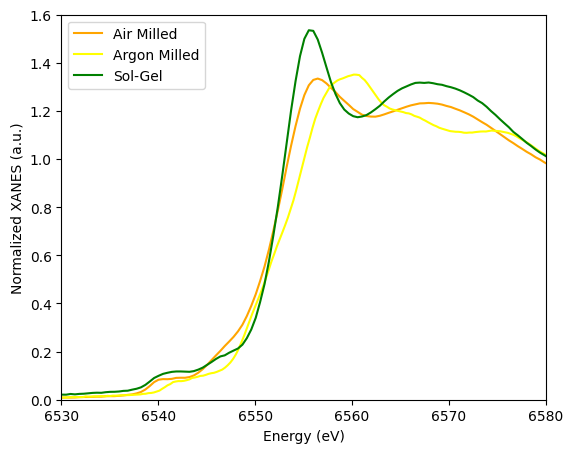

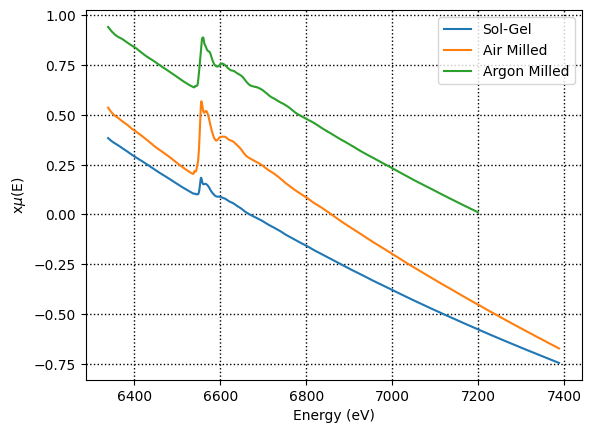

In [3]:
f6_groups={}

for a_set in json_metadata["data_mapping"]:
    project_path = Path(a_set["data_path"])
    for a_mapping in a_set["file_mappings"]:    # project file name
        project_name = a_mapping['file_name']
        # name assigned to the readings for processing and display
        data_group =  a_mapping['group']    
        # the group names use underscores instead of spaces and periods 
        # in athena file
        group_name =  a_mapping['group_name']
        # read each group from the corresponding project file
        athena_project = athenamgr.read_project(Path(project_path,project_name))

        f6_groups[data_group] = athenamgr.get_group(athena_project, group_name)
        f6_groups[data_group].filename = data_group
#define dict to set colours and line stiles

f6_plot_groups={"Air Milled": ["orange", "solid"],
                "Argon Milled": ["yellow", "solid"],
                "Sol-Gel": ["green", "solid"],}

plt = custom_plots.plot_normalised(f6_groups, f6_plot_groups,(6.25,5),[6530, 6580],[0,1.6])
plt.show()

for a_group in f6_groups:
   plt = athenamgr.plot_mu(f6_groups[a_group])

plt.title("")

plt.show()

# 2 Generate scattering paths
This has two subtasks, first reading the metadata and then running feff to get the paths.

## 2.1 Read the fitting variables 
Fitting variables include all resources used for fitting, this includes the crystal files used.

In [4]:
# get run_feff variables from metadata
# get parameters for EXAFS first
exafs_variables = operations_data['task_list'][0]

# we know we are reading data for EXAFS and
# that variables hold the required values
data_path = Path(exafs_variables["variables"]["data_path"])
crystal_files = []
for a_file in exafs_variables["variables"]["crystal_files"]:
    crystal_files.append(str(Path(data_path, a_file)))
    
print(crystal_files)

# paths and parameters are saved as csv files 
# and they can be retrieved (after calculations of FEFF paths)
sel_paths_f = exafs_variables["variables"]["selected_paths"]  
gds_parms_f = exafs_variables["variables"]["gds_parameters"] 

# variables for fit
fit_vars = exafs_variables["variables"]["fit_vars"]

# Need to specify the absorbing atom and maximum radius
absorbing_atoms = exafs_variables["variables"]["absorbing_atoms"]
max_radius = exafs_variables["variables"]["max_radius"]

['..\\wf_data\\pub_723\\additional\\1667441.cif']


## 2.2 Calculate scattering paths
The run_feff function can run on a list of crystals and a list of corresponding absorbing atoms.
The result is returned as a list of directories where the scattering paths have been stored.


In [5]:
# run feff and get a list of feff dirs
feff_dirs = feff_runner.run_feff(crystal_files, absorbing_atoms, max_radius) 

# could prevent running if the files already exist and they are recent (<month old)

Processing: ..\wf_data\pub_723\additional\1667441.cif
check if need to build: 1667441_feff
 : ======== running Feff module C:\Users\scman1\AppData\Local\Programs\Python\Python39\lib\site-packages\larch\bin\win64\feff6l.exe ========
 : Feff 6L.02
 : Formula:    LaMnO3
 : SpaceGroup: Pm-3m
 : # sites:    5
 : Calculating potentials and phases...
 : free atom potential and density for atom type    0
 : free atom potential and density for atom type    1
 : free atom potential and density for atom type    2
 : free atom potential and density for atom type    3
 : overlapped potential and density for unique potential    0
 : overlapped potential and density for unique potential    1
 : overlapped potential and density for unique potential    2
 : overlapped potential and density for unique potential    3
 : muffin tin radii and interstitial parameters
 : phase shifts for unique potential    0
 : phase shifts for unique potential    1
 : phase shifts for unique potential    2
 : phase shifts 

# 2 Plotting Functions 

In [6]:
def plot_rmr(data_set,rmin,rmax,datalabel="data"):
    fig = plt.figure()
    
    plt.tick_params(left=False,labelleft = False) # labels along the bottom edge are off
    
    plt.plot(data_set.data.r, data_set.data.chir_mag, color='b')
    plt.plot(data_set.data.r, data_set.data.chir_re-2, color='b', label=datalabel)
    plt.plot(data_set.model.r, data_set.model.chir_mag, color='r',linestyle='--' )
    plt.plot(data_set.model.r, data_set.model.chir_re-2, color='r', linestyle='--', label='fit')
    plt.xlabel("Radial distance/$\mathrm{\AA}$")
    plt.xlim(0, 5)
    
    
    plt.legend()
    return plt

# 3. Test path combinations

Create a list of path combinations following the filtering criteria (we started with first n paths in list).

In [11]:
importlib.reload(fit_manager)

# A. Test different path combinations
# B. Vary absorbers
# C. Vary GDS parameters

# list all the groups to be fitted
fit_groups={"Air Milled": ["orange", "solid"],
            "Argon Milled": ["yellow", "solid"],
            "Sol-Gel": ["green", "solid"],}

# amp assigned to s02 does not change 
# enot assigned to e0 does not change either
gds_base = {1: {'id': '1', 'name': 'amp', 'value': '1.0', 'expr': '', 'vary': 'True'},
            2: {'id': '2', 'name': 'enot', 'value': '0.0', 'expr': '', 'vary': 'True'},}
# for each path we will add 
gds_base

for a_file in crystal_files:
    crystal_f = Path(a_file)
    feff_dir = "./"+crystal_f.name[:-4]+"_feff"
    paths_info = fit_manager.get_path_labels(Path(feff_dir, 'paths.dat'))
    list_combinations = []
    # combinations of the first five paths in the list (31 combinations):
    for indx in range(1,32):
        combination = list(format(indx,'05b')[::-1])
        #print(combination)
        gds_test = {1: {'id': '1', 'name': 'amp', 'value': '1.0', 'expr': '', 'vary': 'True'},
                    2: {'id': '2', 'name': 'enot', 'value': '0.0', 'expr': '', 'vary': 'True'},}
        sp_list = []
        path_count = 1
        for path_num, use in enumerate(combination):
            if use == '1':
                #print ("testing paths: ", path_num+1)
                #print ("add:", "ss_"+str(path_num+1) )
                #print ("add:", "delr_"+str(path_num+1) )
                id_num = len(gds_test)+1
                gds_test[id_num]={"id":id_num, 'name': "ss_"+str(path_num+1), 
                                 "value": '0.0', 'expr': '', 'vary': 'True'}
                id_num+=1
                gds_test[id_num]={"id":id_num, 'name': "delr_"+str(path_num+1), 
                                 "value": '0.0', 'expr': '', 'vary': 'True'}
                sp_list.append( {'id': path_count,
                                 'filename':feff_dir+"/feff"+"%04d"%(path_num+1)+".dat",
                                 'label':paths_info[str(path_num+1)]['label']+str(path_num+1),
                                 's02':"amp",
                                 'e0':"enot",
                                 'sigma2':"ss_"+str(path_num+1),
                                 'deltar':"delr_"+str(path_num+1)})
                path_count+=1
        list_combinations.append({"pattern":combination,"gds_vars":gds_test,"sp_vars":sp_list})

print("Path combinations:", len(list_combinations))

Path combinations: 31


Path combinations: 31
Testing paths: ['1', '0', '0', '0', '0']
R-factor 28.66%


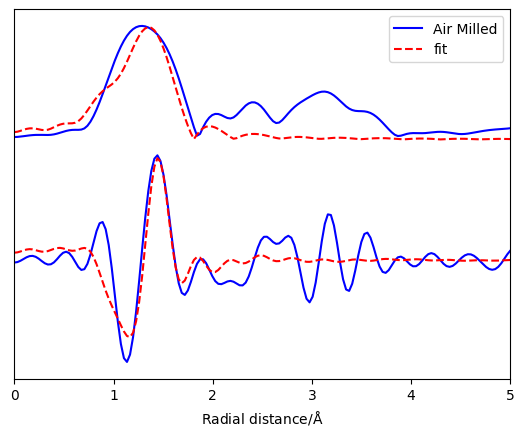

R-factor 58.85%


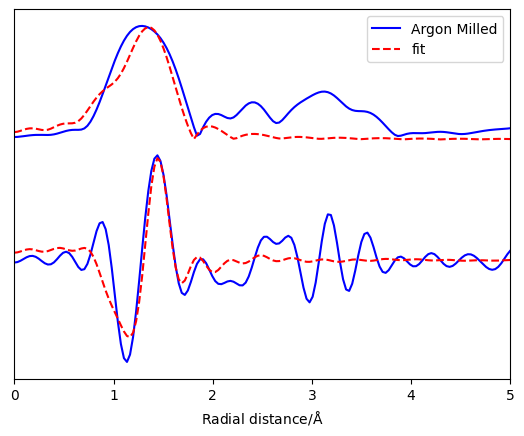

R-factor 38.69%


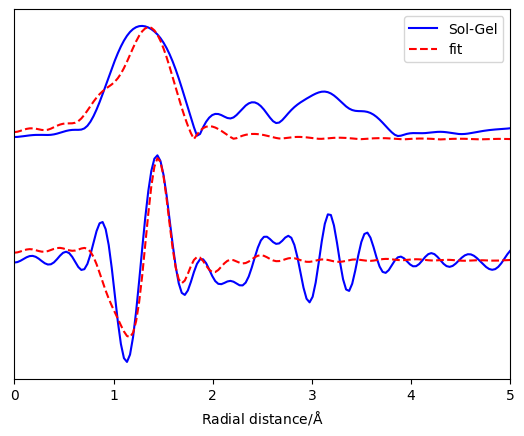

Testing paths: ['0', '1', '0', '0', '0']
R-factor 94.51%


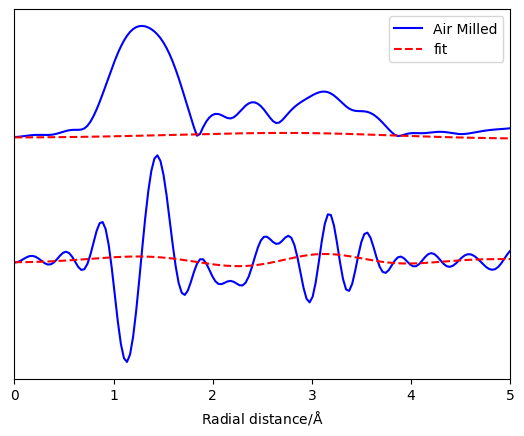

R-factor 66.41%


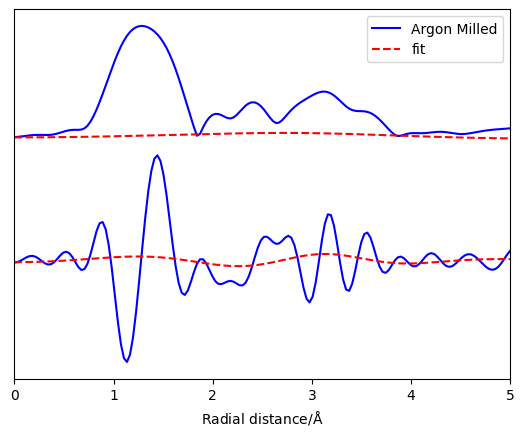

R-factor 99.07%


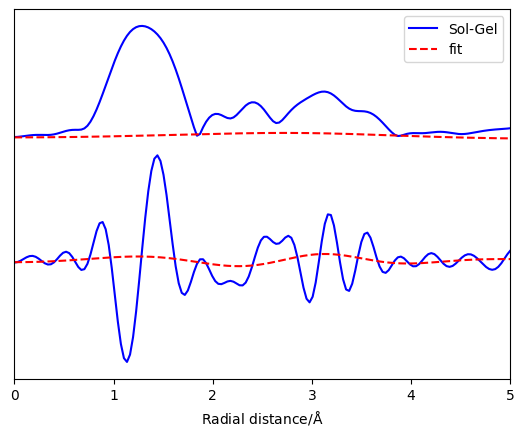

Testing paths: ['1', '1', '0', '0', '0']
R-factor 27.27%


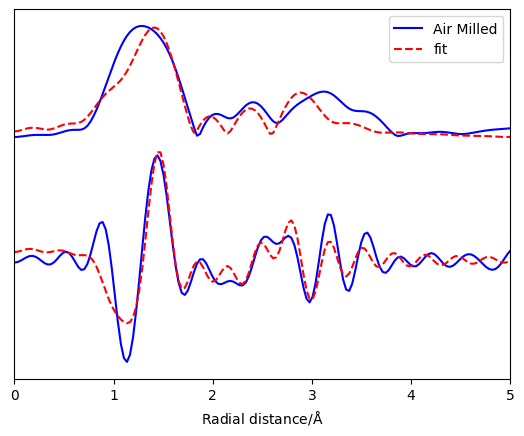

R-factor 51.67%


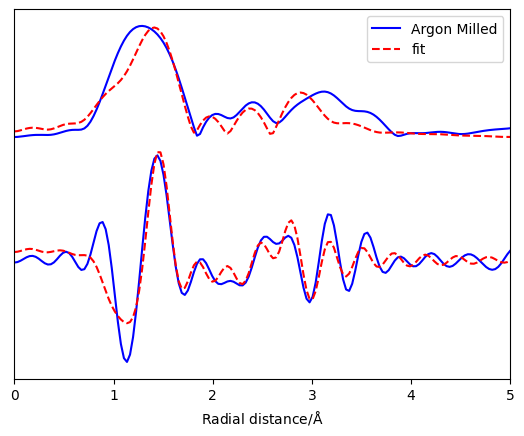

R-factor 27.53%


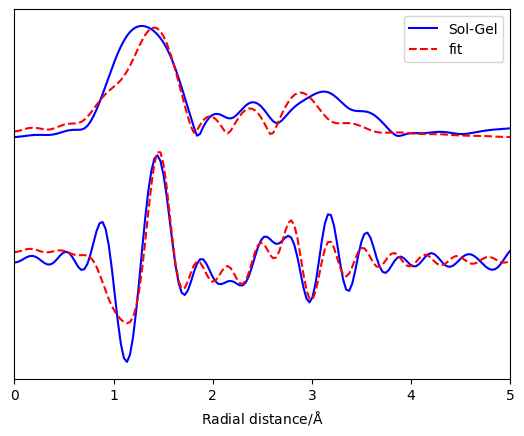

Testing paths: ['0', '0', '1', '0', '0']
R-factor 95.46%


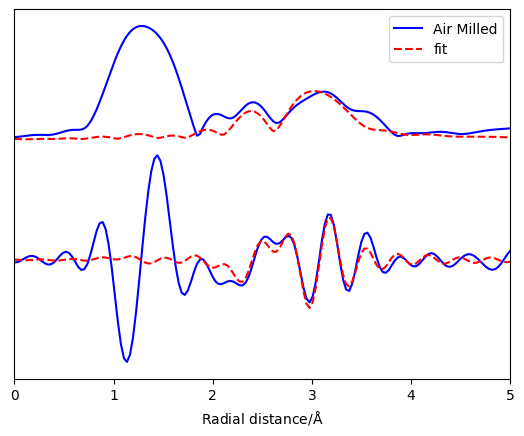

R-factor 64.49%


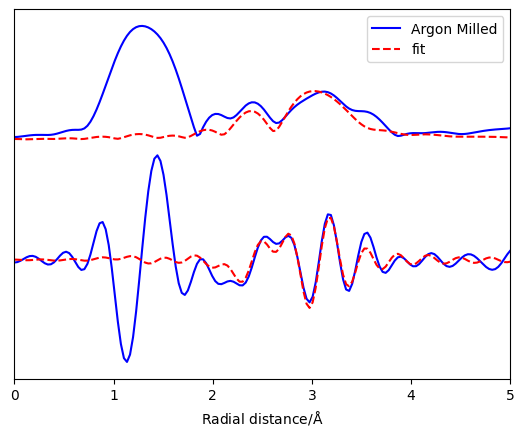

R-factor 84.34%


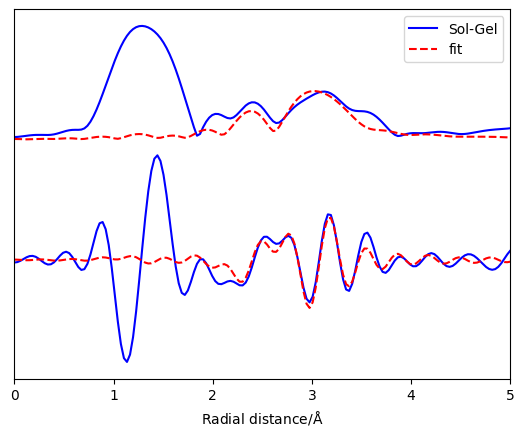

Testing paths: ['1', '0', '1', '0', '0']
R-factor 24.98%


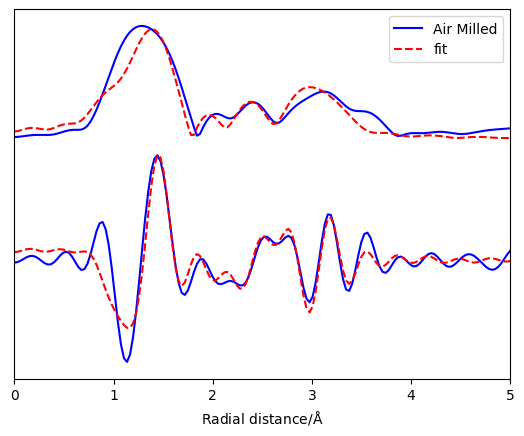

R-factor 27.02%


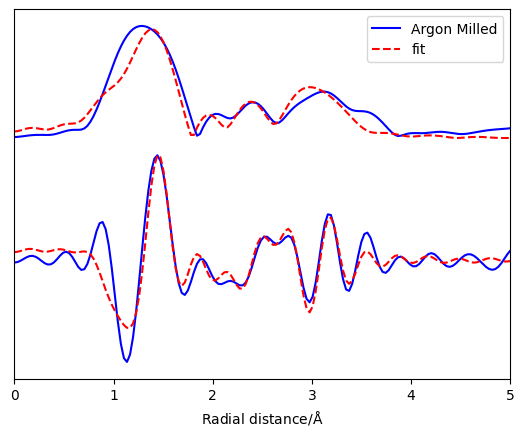

R-factor 22.27%


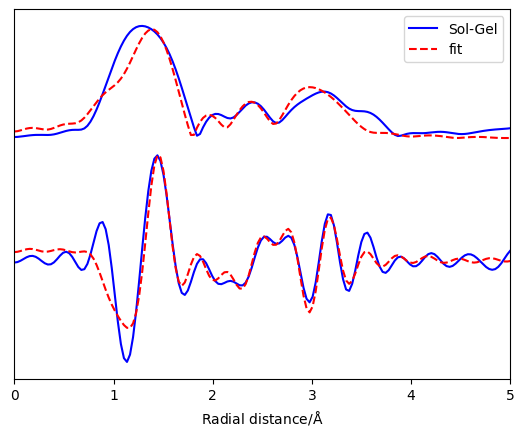

Testing paths: ['0', '1', '1', '0', '0']
R-factor 36.97%


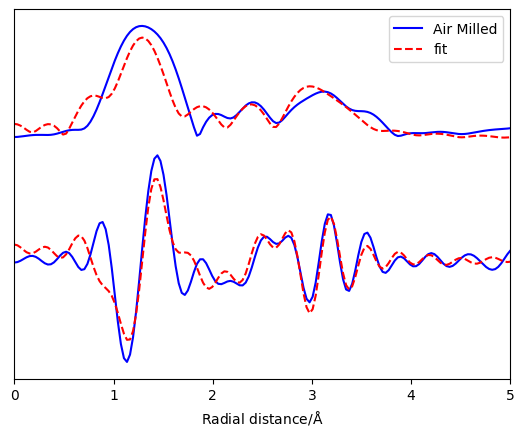

R-factor 64.24%


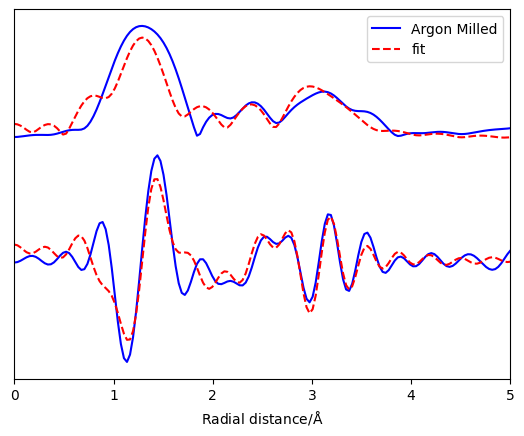

R-factor 29.34%


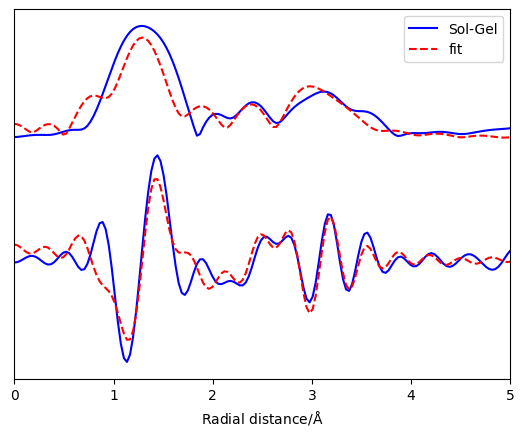

Testing paths: ['1', '1', '1', '0', '0']
R-factor 23.74%


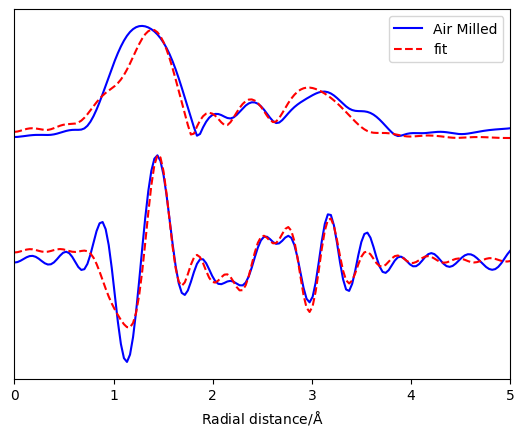

R-factor 17.50%


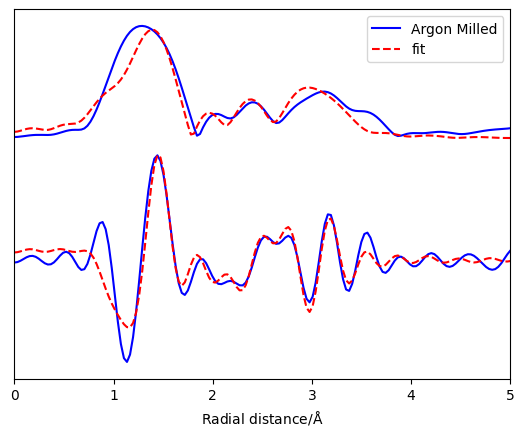

R-factor 22.02%


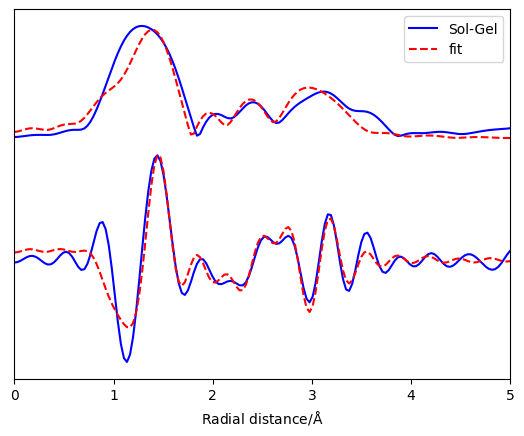

Testing paths: ['0', '0', '0', '1', '0']
R-factor 94.83%


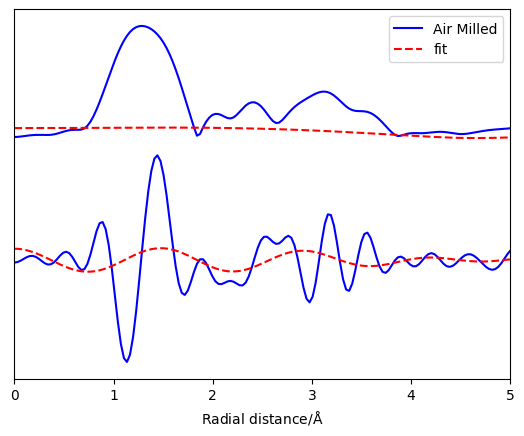

R-factor 60.46%


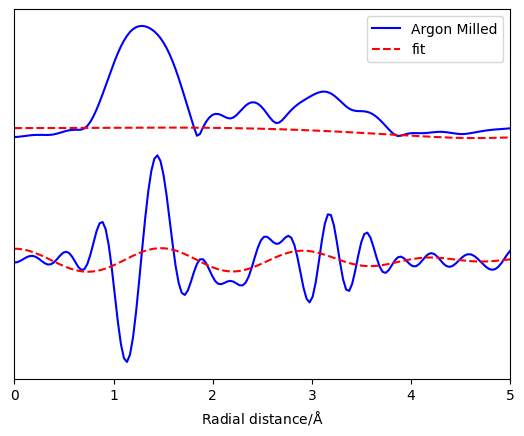

R-factor 95.32%


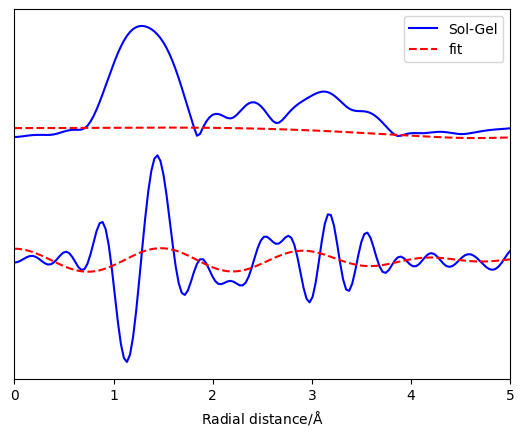

Testing paths: ['1', '0', '0', '1', '0']
R-factor 22.89%


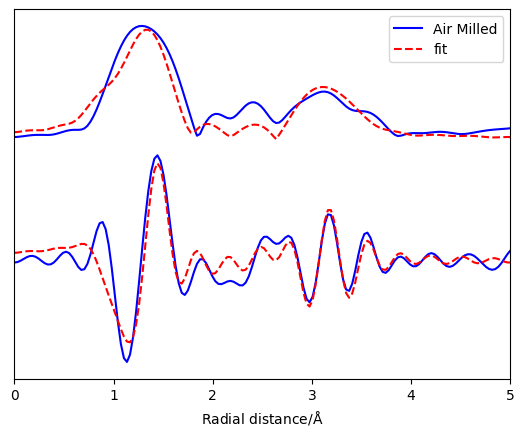

R-factor 58.85%


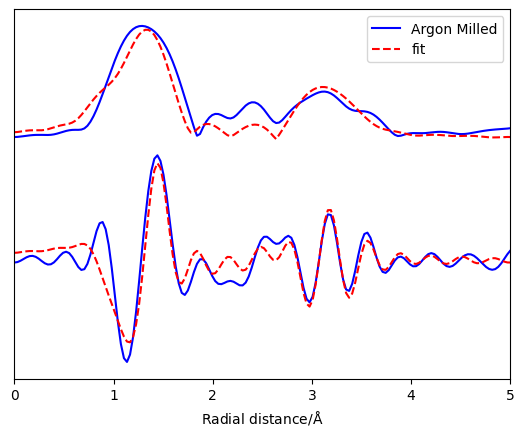

R-factor 23.76%


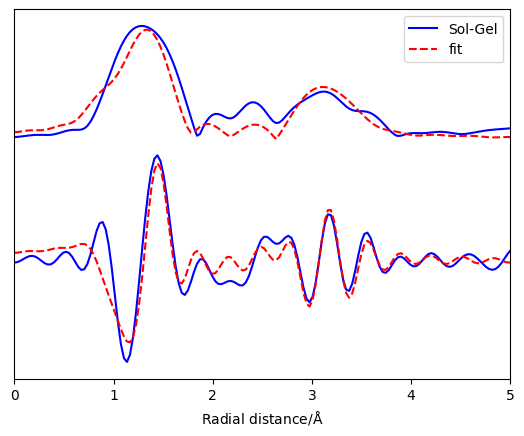

Testing paths: ['0', '1', '0', '1', '0']
R-factor 95.23%


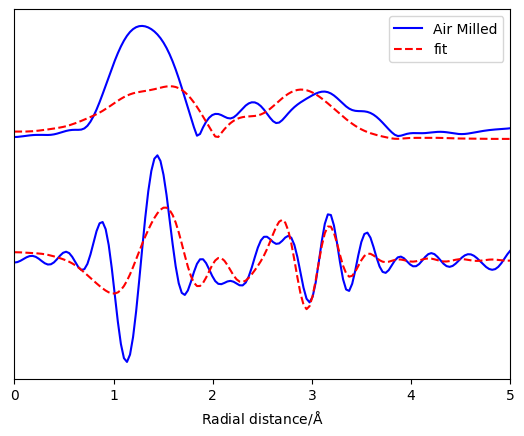

R-factor 65.22%


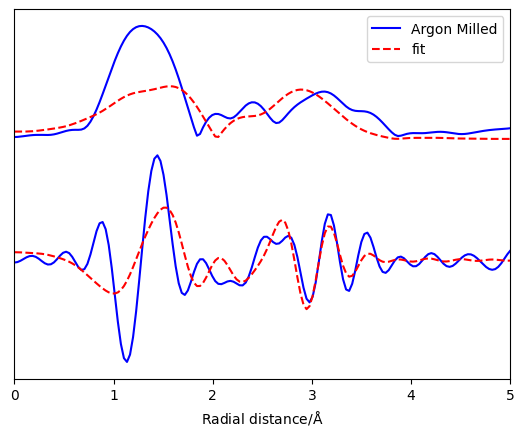

R-factor 61.18%


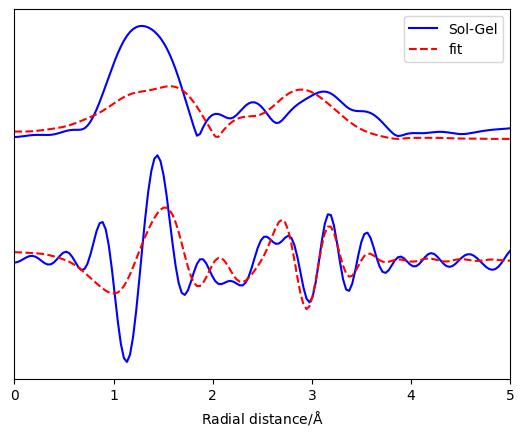

Testing paths: ['1', '1', '0', '1', '0']
R-factor 21.01%


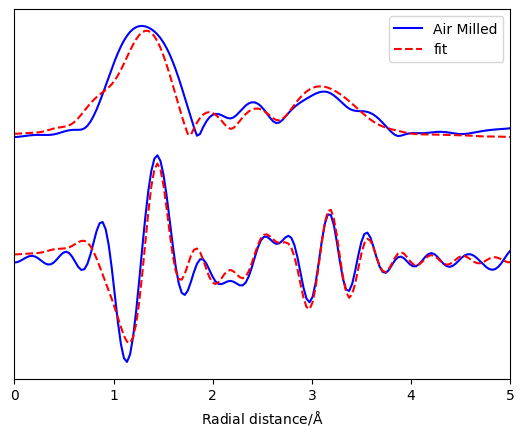

R-factor 16.98%


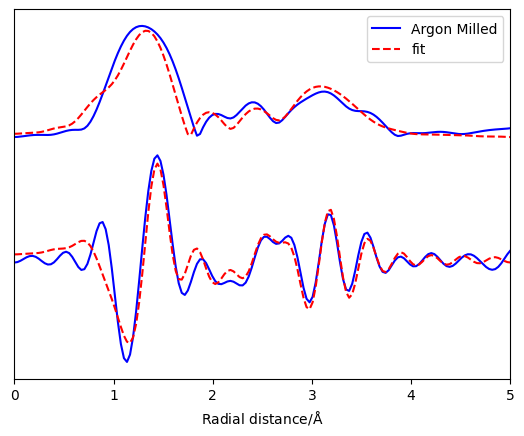

R-factor 20.27%


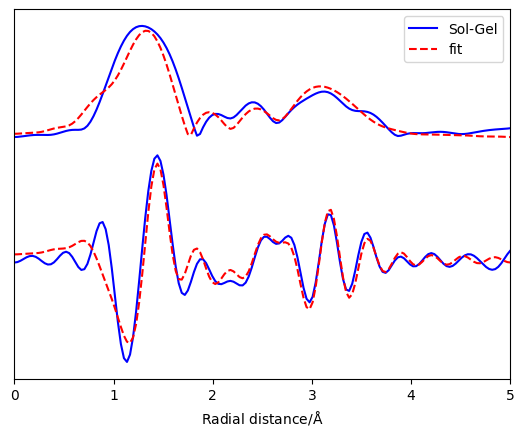

Testing paths: ['0', '0', '1', '1', '0']
R-factor 95.13%


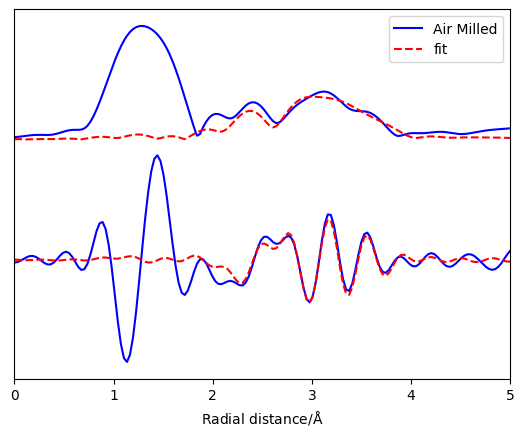

R-factor 59.42%


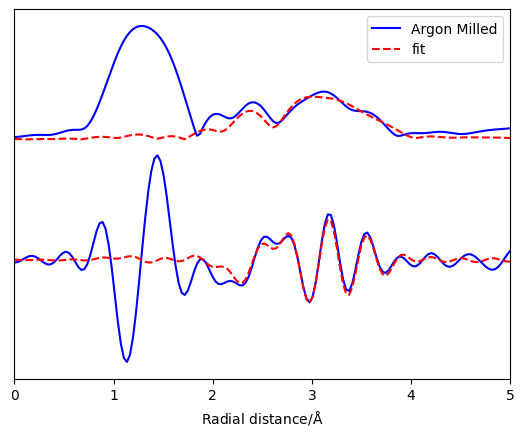

R-factor 83.38%


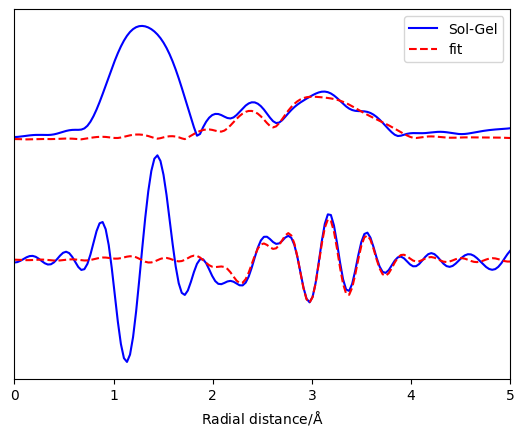

Testing paths: ['1', '0', '1', '1', '0']
R-factor 24.70%


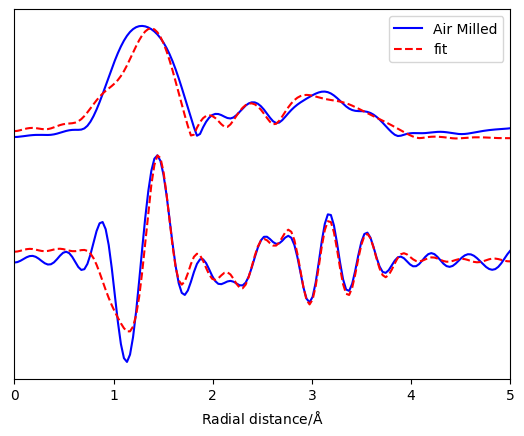

R-factor 17.23%


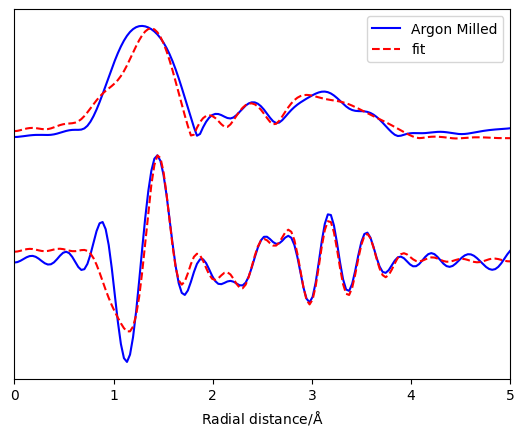

R-factor 20.63%


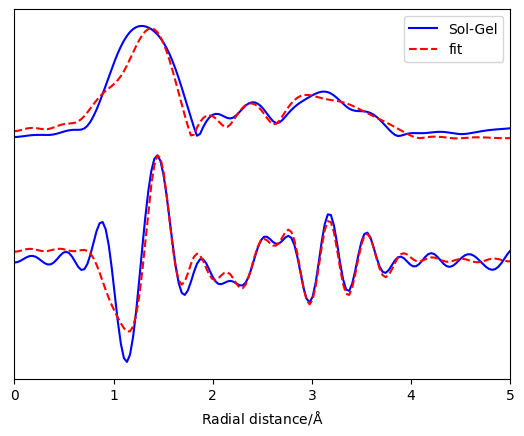

Testing paths: ['0', '1', '1', '1', '0']
R-factor 95.13%


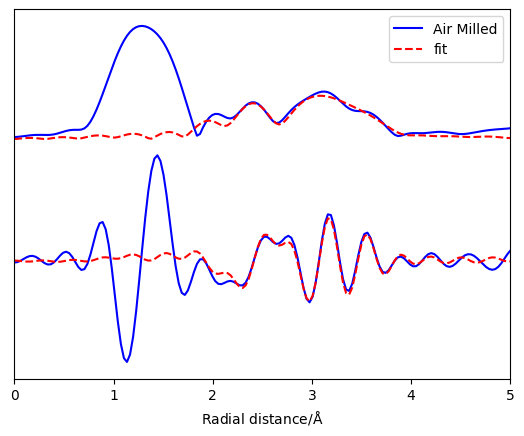

R-factor 57.25%


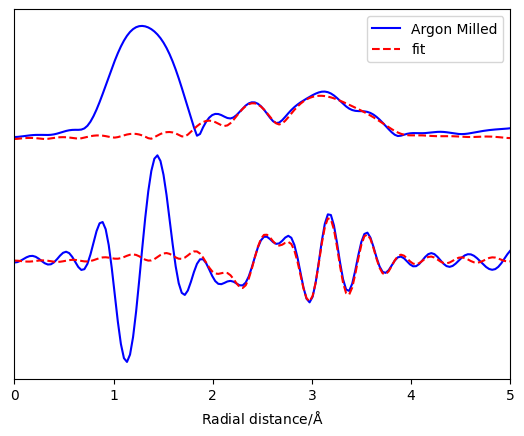

R-factor 81.28%


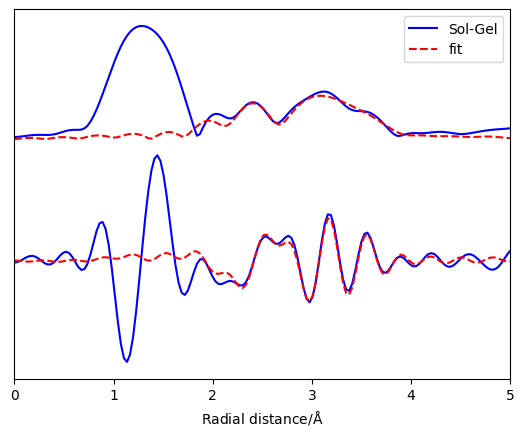

Testing paths: ['1', '1', '1', '1', '0']
R-factor 23.06%


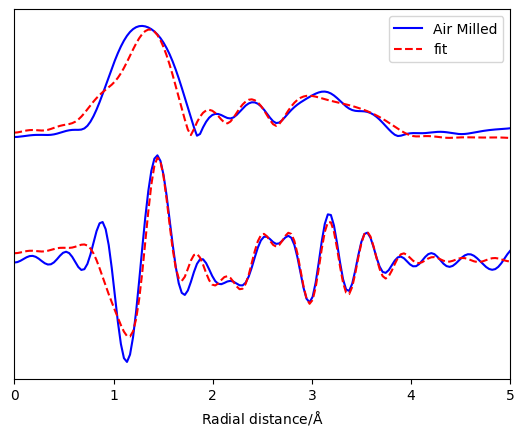

R-factor 16.76%


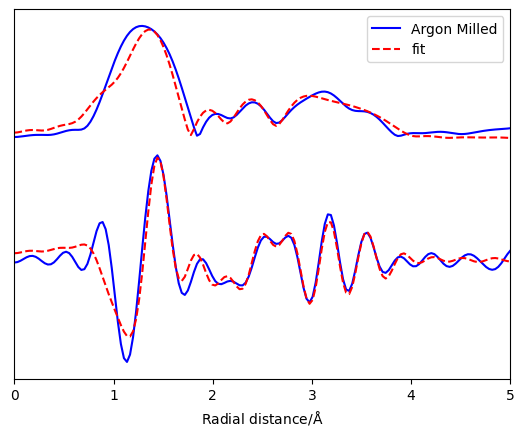

R-factor 19.63%


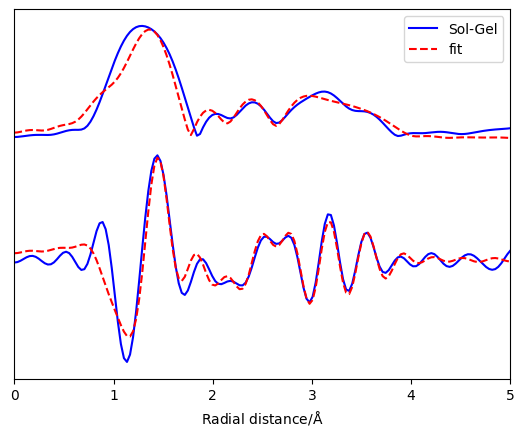

Testing paths: ['0', '0', '0', '0', '1']
R-factor 94.83%


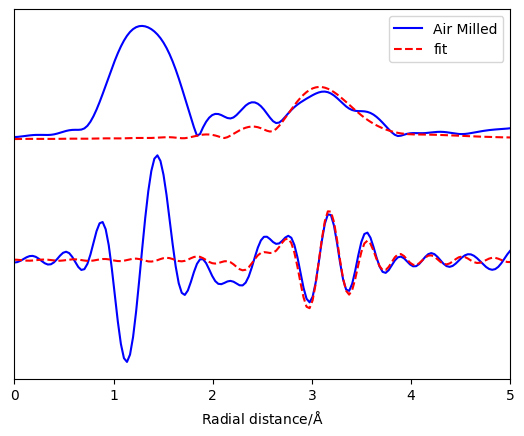

R-factor 60.45%


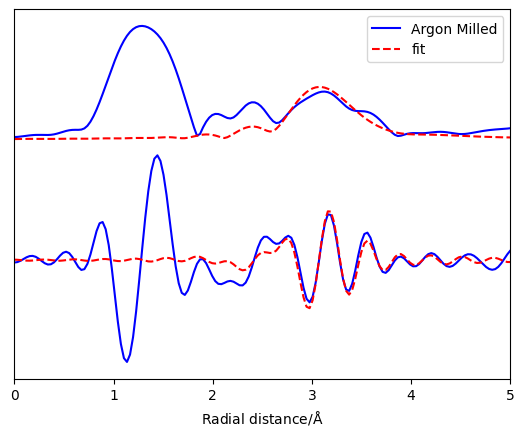

R-factor 83.34%


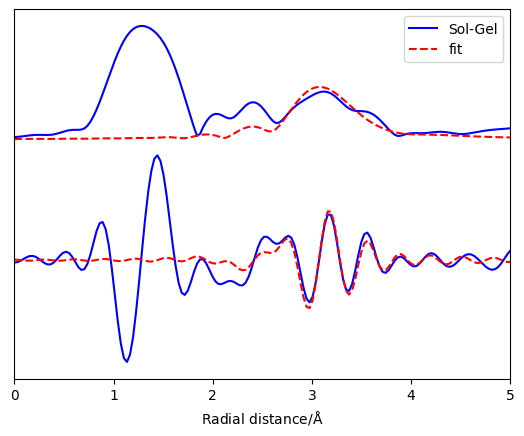

Testing paths: ['1', '0', '0', '0', '1']
R-factor 27.10%


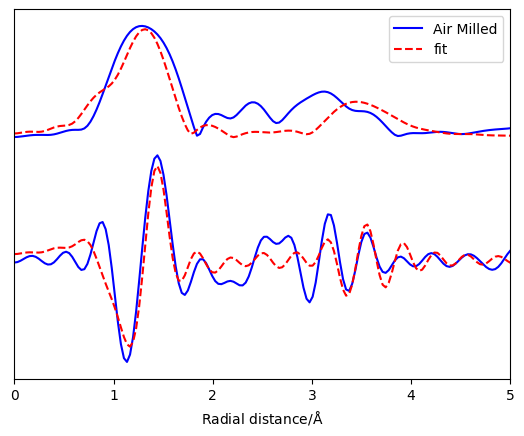

R-factor 57.96%


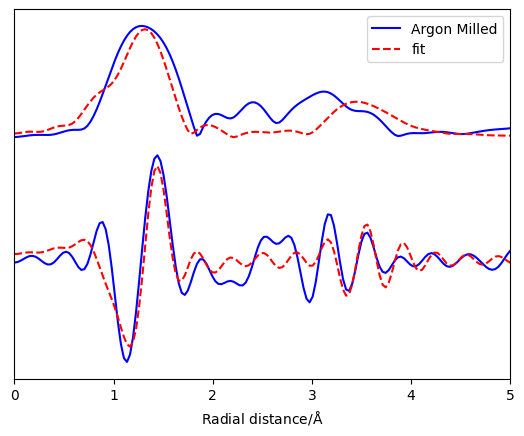

R-factor 32.02%


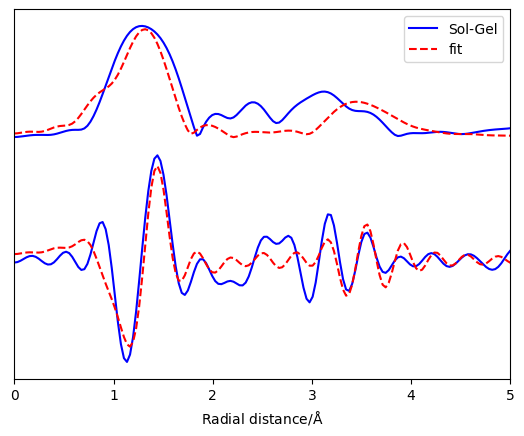

Testing paths: ['0', '1', '0', '0', '1']
R-factor 94.39%


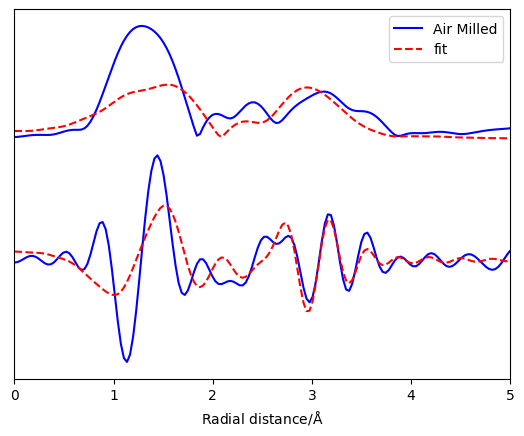

R-factor 65.24%


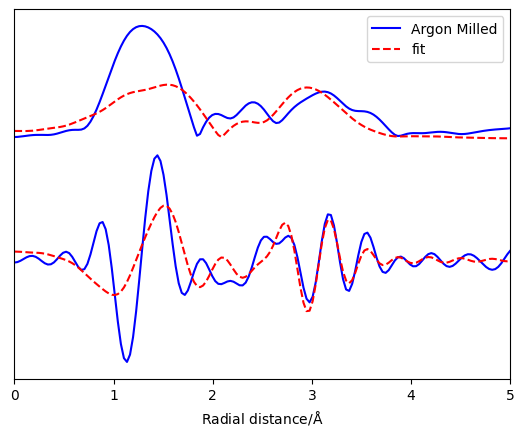

R-factor 59.37%


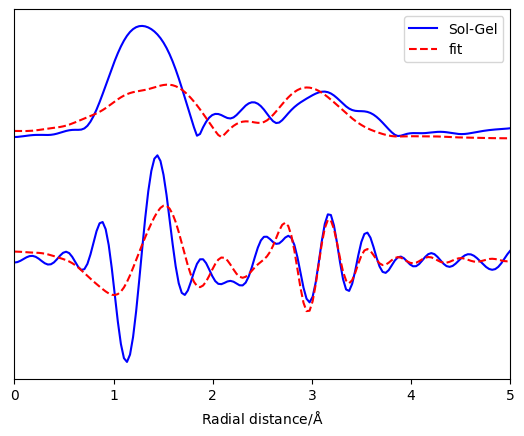

Testing paths: ['1', '1', '0', '0', '1']
R-factor 20.42%


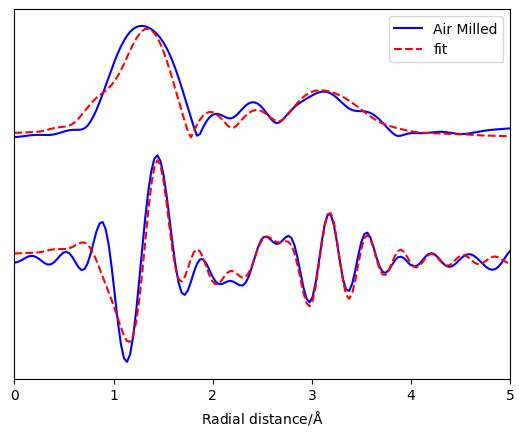

R-factor 15.81%


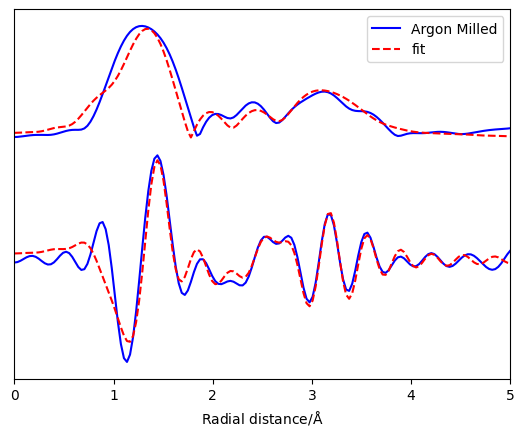

R-factor 19.06%


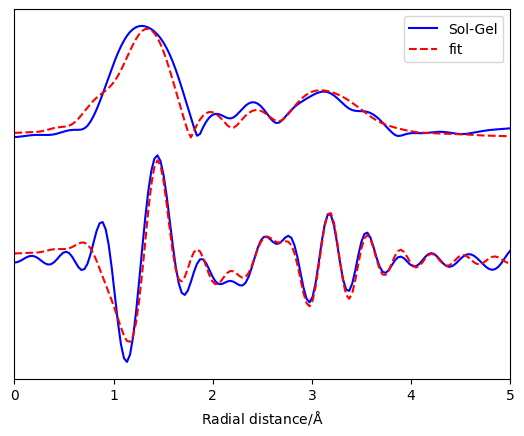

Testing paths: ['0', '0', '1', '0', '1']
R-factor 95.07%


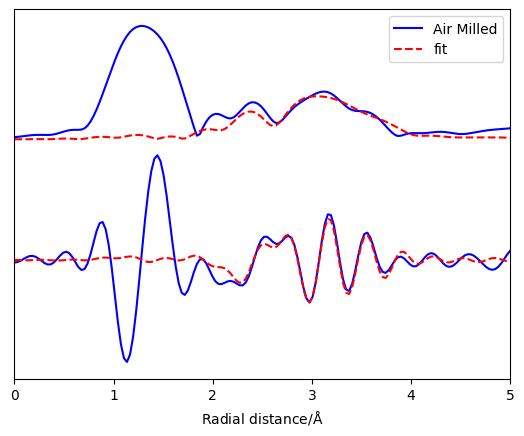

R-factor 63.19%


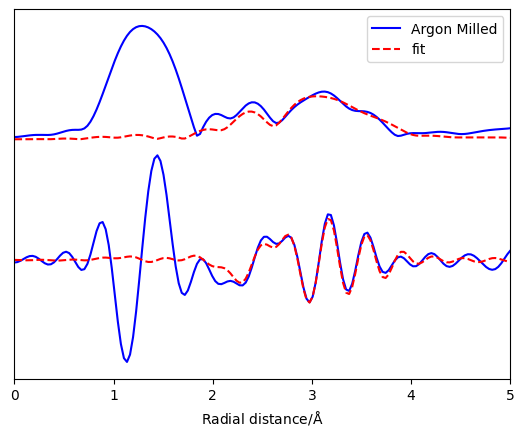

R-factor 83.21%


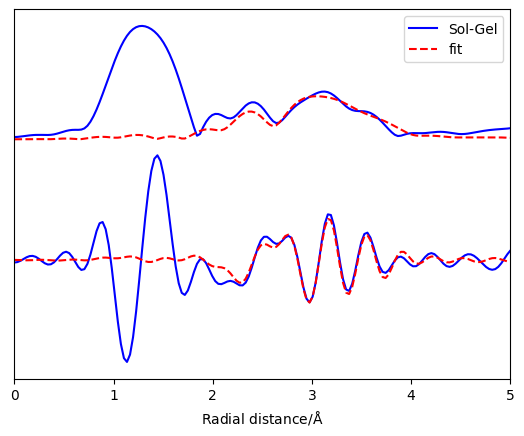

Testing paths: ['1', '0', '1', '0', '1']
R-factor 24.14%


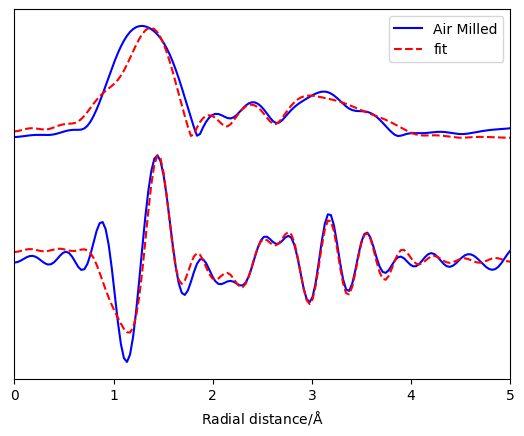

R-factor 26.00%


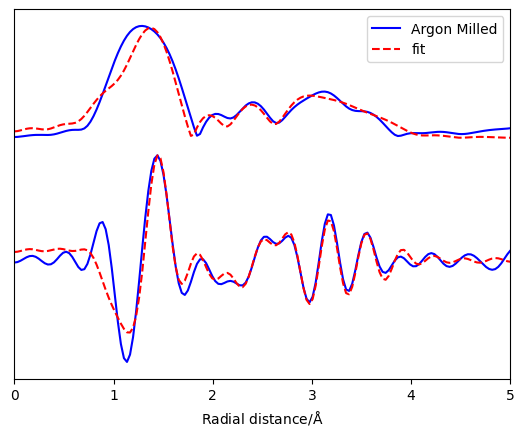

R-factor 20.36%


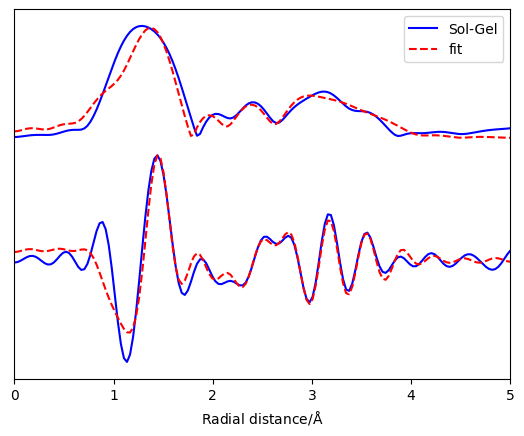

Testing paths: ['0', '1', '1', '0', '1']
R-factor 93.78%


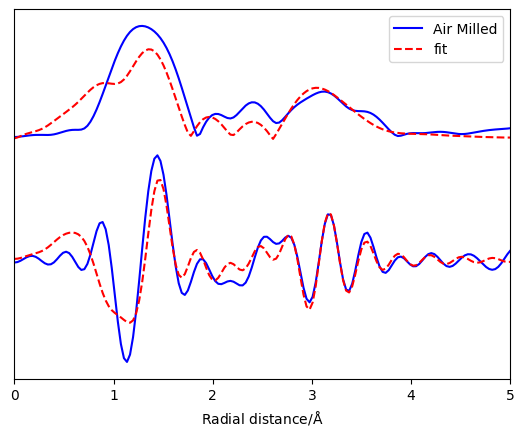

R-factor 55.26%


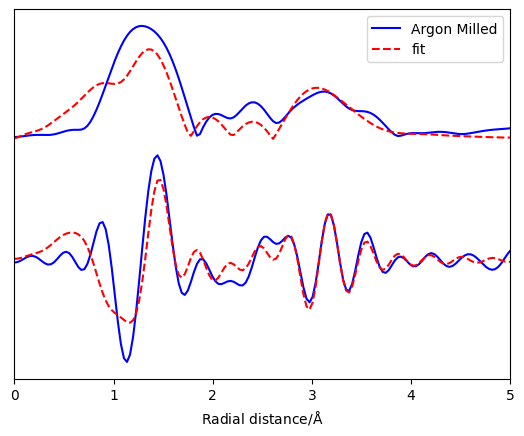

R-factor 36.11%


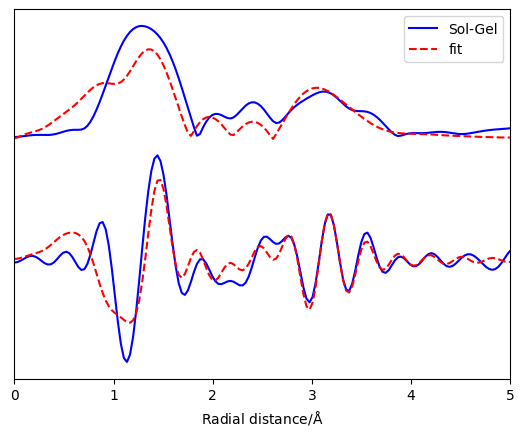

Testing paths: ['1', '1', '1', '0', '1']
R-factor 22.88%


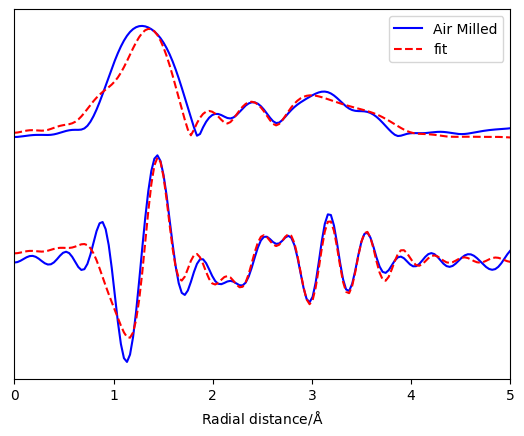

R-factor 17.05%


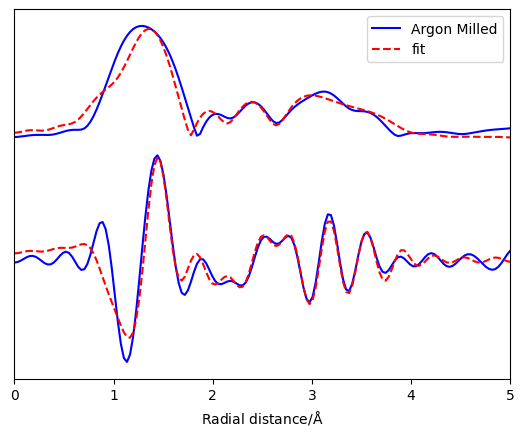

R-factor 19.43%


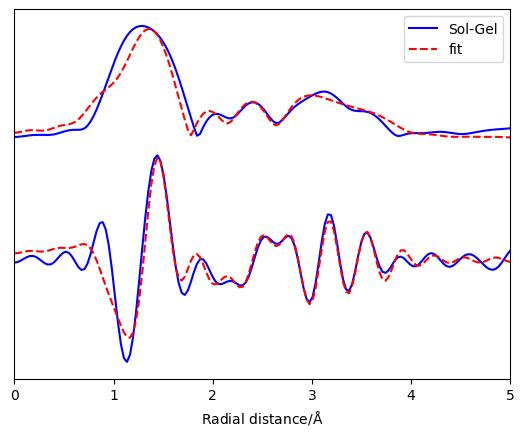

Testing paths: ['0', '0', '0', '1', '1']
R-factor 94.51%


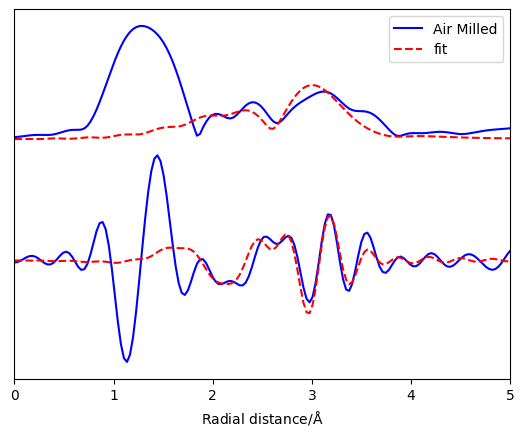

R-factor 57.46%


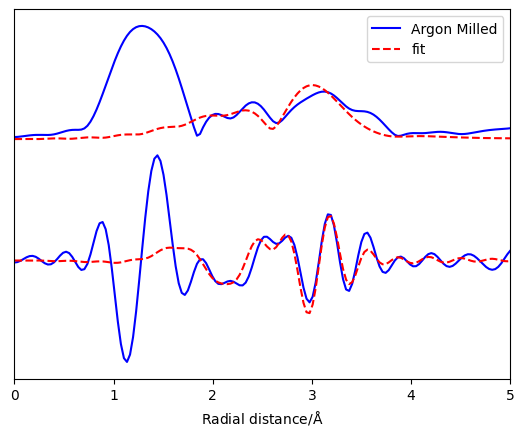

R-factor 79.68%


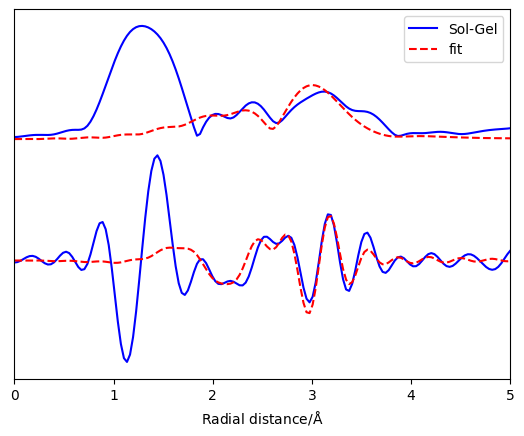

Testing paths: ['1', '0', '0', '1', '1']
R-factor 22.87%


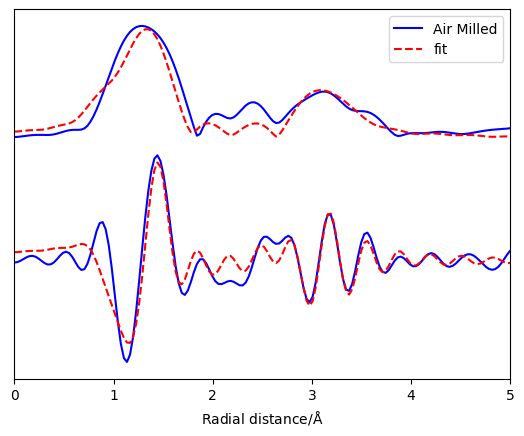

R-factor 22.89%


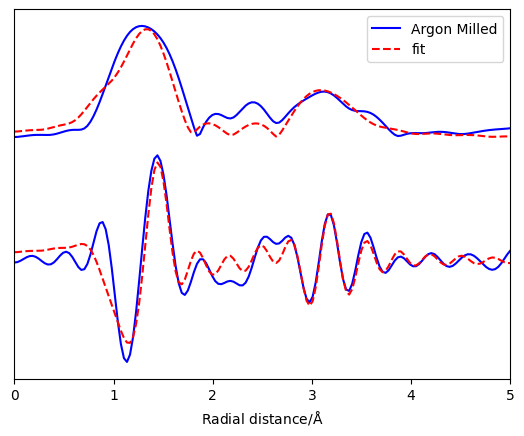

R-factor 23.58%


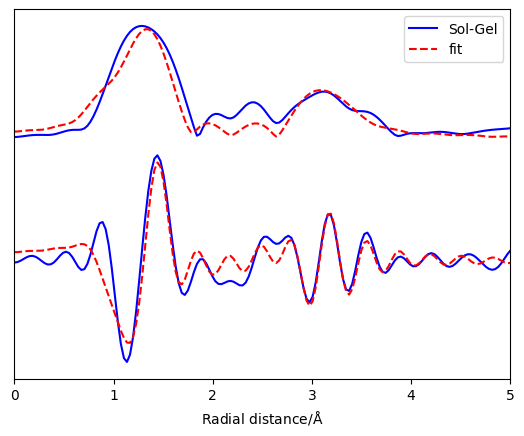

Testing paths: ['0', '1', '0', '1', '1']
R-factor 92.98%


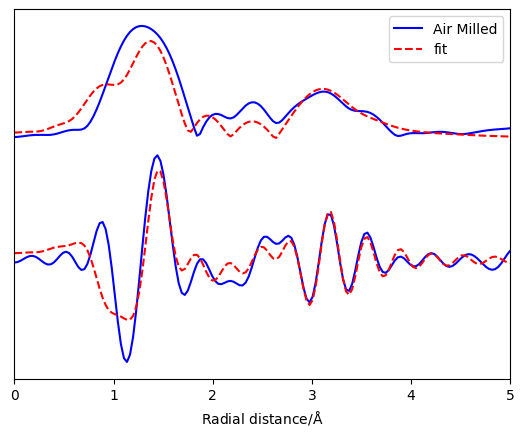

R-factor 62.45%


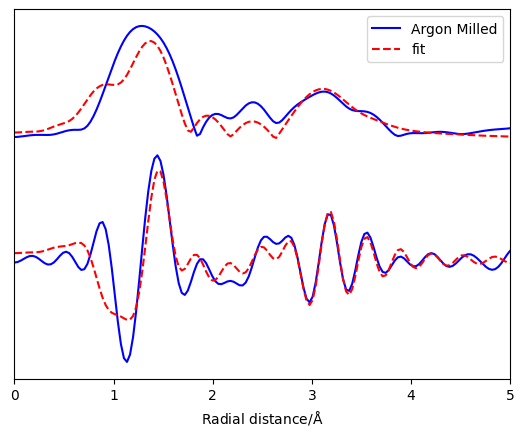

R-factor 33.35%


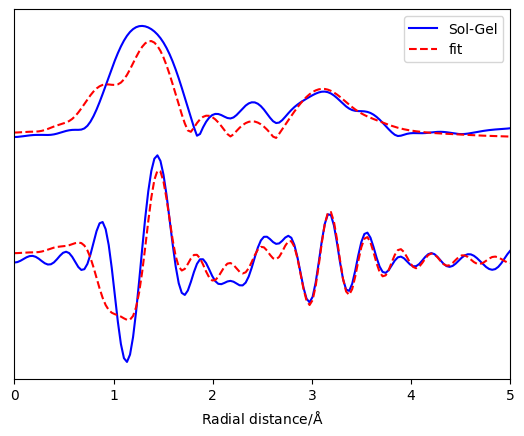

Testing paths: ['1', '1', '0', '1', '1']
R-factor 20.22%


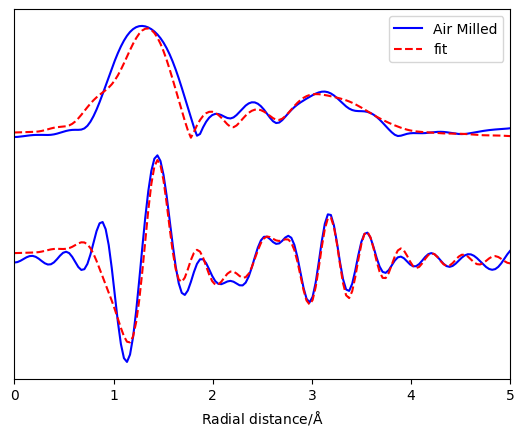

R-factor 22.89%


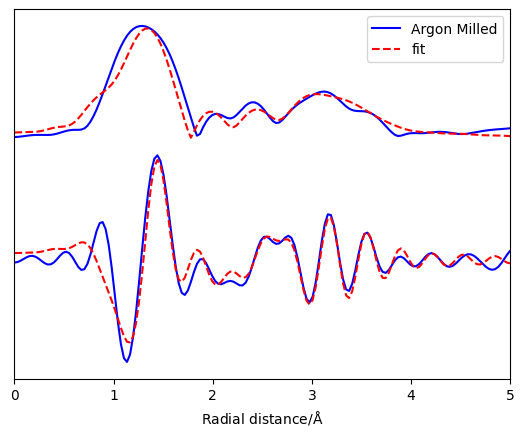

R-factor 18.80%


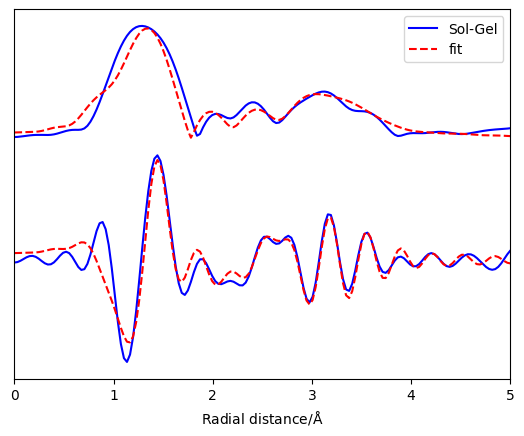

Testing paths: ['0', '0', '1', '1', '1']
R-factor 94.78%


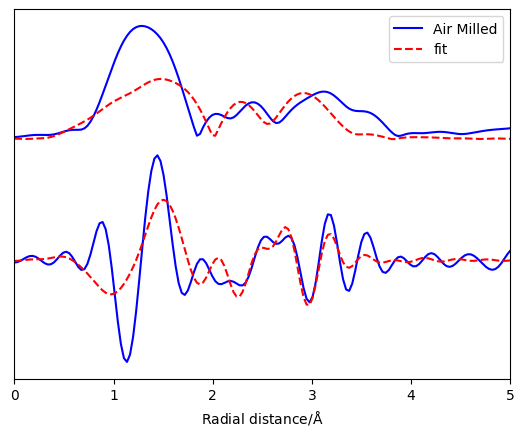

R-factor 60.14%


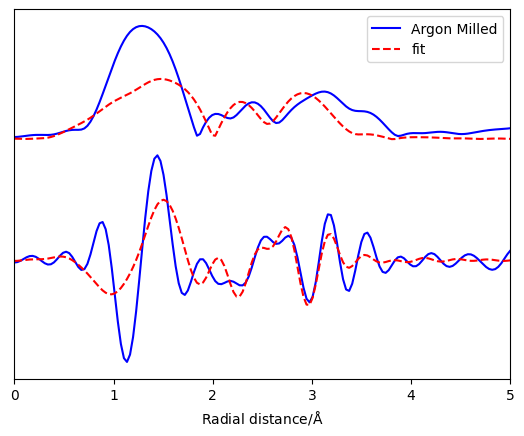

R-factor 60.01%


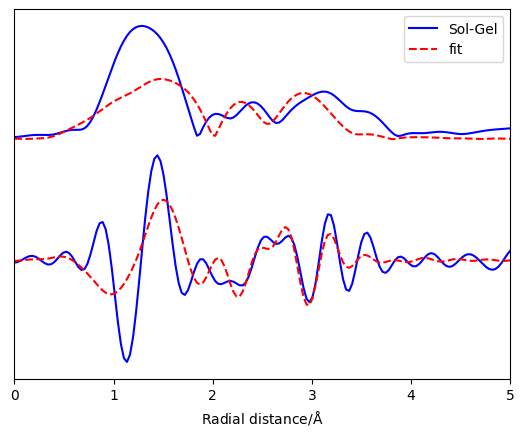

Testing paths: ['1', '0', '1', '1', '1']
Error for: Air Milled with combination 10111
R-factor 16.37%


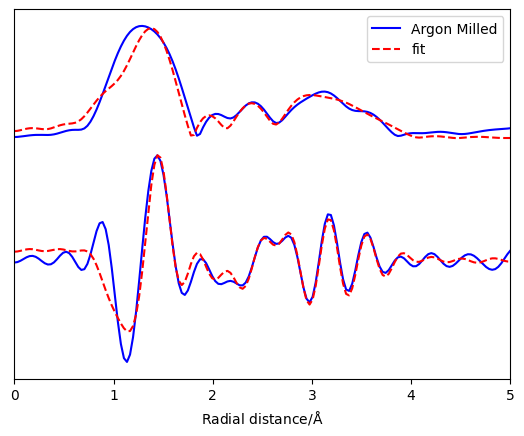

R-factor 20.46%


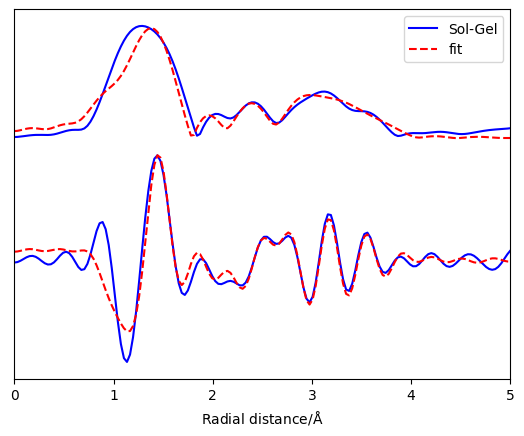

Testing paths: ['0', '1', '1', '1', '1']
R-factor 94.66%


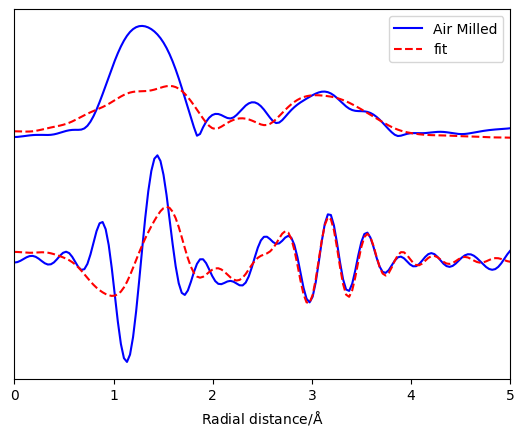

R-factor 54.74%


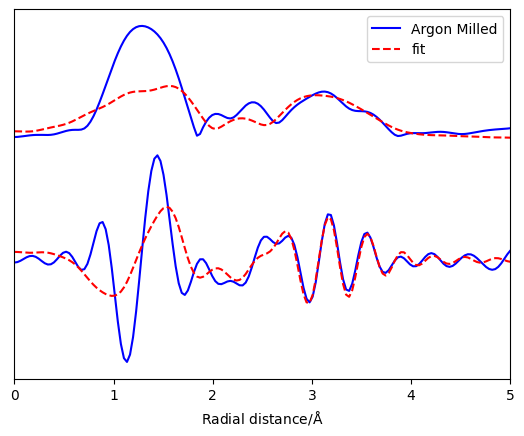

R-factor 59.20%


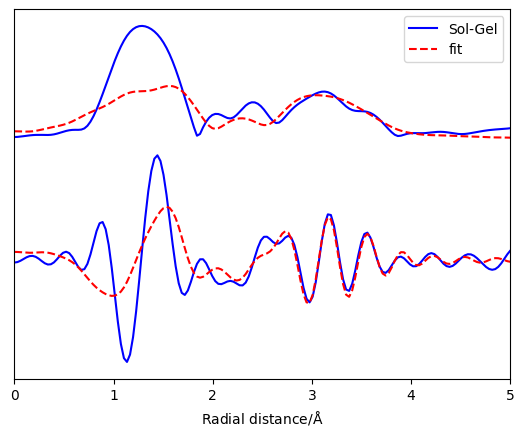

Testing paths: ['1', '1', '1', '1', '1']
Error for: Argon Milled with combination 11111
R-factor 23.06%


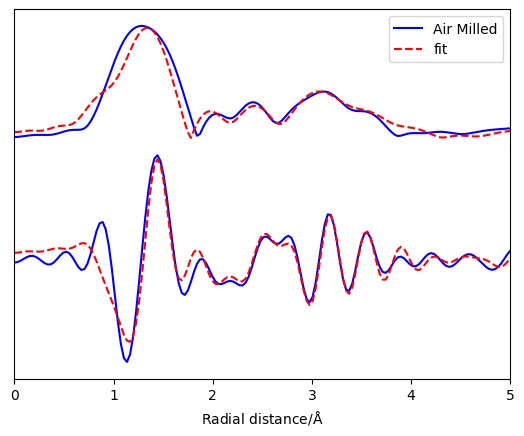

R-factor 18.21%


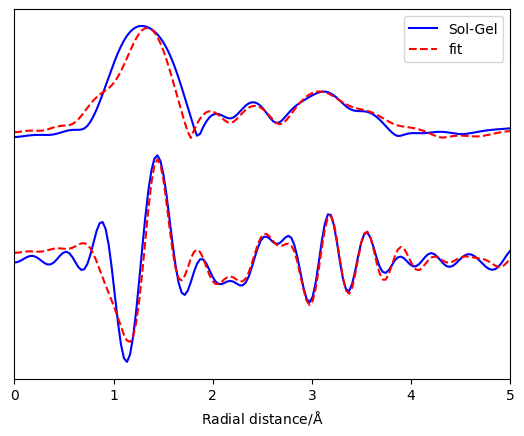

In [7]:
best_r={}
for a_test in list_combinations:
    print("Testing paths:", a_test['pattern'])
    # convert the gds vars to a gds parameters group
    gds_params = fit_manager.dict_to_gds(a_test['gds_vars'], session)
    # convert the pareameter vars to a gds parameters group
    sp_list =fit_manager.dict_to_sp(a_test['sp_vars'], session)
    fit_list = {}
    for a_group in fit_groups:
        try:
            trans, dset, out = fit_manager.run_fit(f6_groups[a_group], gds_params, sp_list, fit_vars, session)
            fit_list[a_group]= [trans, dset, out]
        except:
            print("Error for:", a_group, "with combination", ''.join(a_test['pattern'] ))

    
    for a_fit in fit_list:
        print("R-factor %.2f"%(fit_list[a_fit][2].rfactor*100)+"%")
        if not a_fit in best_r:
            best_r[a_fit] = (fit_list[a_fit][2].rfactor, ''.join(a_test['pattern']))
        elif best_r[a_fit][0] > fit_list[a_fit][2].rfactor:
            best_r[a_fit] = (fit_list[a_fit][2].rfactor, ''.join(a_test['pattern']))
        chikr_p = custom_plots.plot_rmr(dset,fit_vars['rmin'],fit_vars['rmax'], a_fit)
        chikr_p.show()
    

In [8]:
paths_info

{'1': {'index': '1', 'nleg': '2', 'degeneracy': '6.000', 'label': 'O.Mn'},
 '2': {'index': '2', 'nleg': '3', 'degeneracy': '24.000', 'label': 'O.O.Mn'},
 '3': {'index': '3', 'nleg': '2', 'degeneracy': '8.000', 'label': 'La.Mn'},
 '4': {'index': '4', 'nleg': '2', 'degeneracy': '4.000', 'label': 'Mn.Mn'},
 '5': {'index': '5', 'nleg': '2', 'degeneracy': '2.000', 'label': 'Mn.Mn'},
 '6': {'index': '6', 'nleg': '3', 'degeneracy': '6.000', 'label': 'O.O.Mn'},
 '7': {'index': '7', 'nleg': '3', 'degeneracy': '8.000', 'label': 'Mn.O.Mn'},
 '8': {'index': '8', 'nleg': '3', 'degeneracy': '4.000', 'label': 'Mn.O.Mn'},
 '9': {'index': '9', 'nleg': '4', 'degeneracy': '6.000', 'label': 'O.Mn.O.Mn'},
 '10': {'index': '10',
  'nleg': '4',
  'degeneracy': '6.000',
  'label': 'O.Mn.O.Mn'},
 '11': {'index': '11',
  'nleg': '4',
  'degeneracy': '4.000',
  'label': 'O.Mn.O.Mn'},
 '12': {'index': '12',
  'nleg': '4',
  'degeneracy': '2.000',
  'label': 'O.Mn.O.Mn'},
 '13': {'index': '13',
  'nleg': '4',
  'd

The smallest R factor identifies the best fits for the data. These are saved in best_r

In [9]:
best_r

{'Air Milled': (0.20221296441969938, '11011'),
 'Argon Milled': (0.15805068228573788, '11001'),
 'Sol-Gel': (0.1821216542273459, '11111')}

In [10]:
list_combinations

[{'pattern': ['1', '0', '0', '0', '0'],
  'gds_vars': {1: {'id': '1',
    'name': 'amp',
    'value': '1.0',
    'expr': '',
    'vary': 'True'},
   2: {'id': '2', 'name': 'enot', 'value': '0.0', 'expr': '', 'vary': 'True'},
   3: {'id': 3, 'name': 'ss_1', 'value': '0.0', 'expr': '', 'vary': 'True'},
   4: {'id': 4, 'name': 'delr_1', 'value': '0.0', 'expr': '', 'vary': 'True'}},
  'sp_vars': [{'id': 1,
    'filename': './1667441_feff/feff0001.dat',
    'label': 'O.Mn1',
    's02': 'amp',
    'e0': 'enot',
    'sigma2': 'ss_1',
    'deltar': 'delr_1'}]},
 {'pattern': ['0', '1', '0', '0', '0'],
  'gds_vars': {1: {'id': '1',
    'name': 'amp',
    'value': '1.0',
    'expr': '',
    'vary': 'True'},
   2: {'id': '2', 'name': 'enot', 'value': '0.0', 'expr': '', 'vary': 'True'},
   3: {'id': 3, 'name': 'ss_2', 'value': '0.0', 'expr': '', 'vary': 'True'},
   4: {'id': 4, 'name': 'delr_2', 'value': '0.0', 'expr': '', 'vary': 'True'}},
  'sp_vars': [{'id': 1,
    'filename': './1667441_feff/fe

# Reproduce R. H. Blackmore et al, Phys. Chem. Chem. Phys., 2020,22, 18774-18787 

This notebook demonstrates reproducing the XAS results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 

R. H. Blackmore, M. E. Rivas, G. F. Tierney, K. M. H. .Mohammed, D. Decarolis, S. Hayama, F. Venturini, G. Held, R. Arrigo, M. Amboage, P. Hellier, E. W. Lynch, M. Amri, M. Casavola, T. Eralp Erden, P. Collier, P. P. Wells (2020) **The electronic structure, surface properties, and in situ N2O decomposition of mechanochemically synthesised LaMnO3** DOI: [10.1039/d0cp00793e](http://doi.org/10.1039/d0cp00793e).

- **Corresponding authors**: P. P. Wells
- **E-mails**: 

The data used for reproducing the results was published in the University of Southampton Institutional Repository doi:[10.5258/SOTON/D1342](http://dx.doi.org/10.5258/SOTON/D1342)

For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)